In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, activations
import os
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive'

 1
 2
 3
 4
 4180_20-11-2017
 AGROICT
'Blood new project.rar'
'Bruno Siciliano, Oussama Khatib (eds.) - Springer Handbook of Robotics (2016, Springer International Publishing).pdf'
'BU_Digital Logic Design'
'BU_microprocessor and com architecture'
'CNN Custom.rar'
'David Harris, Sarah Harris - Digital Design and Computer Architecture (2007) (1).pdf'
'David Harris, Sarah Harris - Digital Design and Computer Architecture (2007).pdf'
 Day2_Session1_5_CNN_Transfer_Learning_Cats_vs_Dogs.ipynb
'Deep Learning for Household Load Forecasting – A Novel Pooling Deep RNN.pdf'
'Digital Design Project team.gform'
'Digital Design Quiz1.gform'
'Feedback 1.gform'
'Getting started.pdf'
'HLS for IoT'
 MLS
 New4180
 PHY_data
 PHYresult
'Quiz 2.gform'
'Quiz 3 ECSE201L.gform'
 Res-Unet_1.h5
 Res-Unet_2.h5
 Res-Unet_3.h5
 Res-Unet_4.h5
'Robotics Workshop (2017)'
'Student Details_B1 2018.gform'
'Student Details (File responses)'
 test_images
'Toy Factory Visit 1 11 18 (Responses).gsheet'
 train_images
'Untitl

In [1]:
import numpy as np
import pandas as pd
df= pd.read_csv('./train2.csv')

In [2]:

df['EncodedPixels'] = df['EncodedPixels'].replace(np.nan, "na")

In [3]:
df.head(10)

,Unnamed: 0,ImageId_ClassId,EncodedPixels,ImageId,ClassId
0,0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1
1,1,0002cc93b.jpg_2,na,0002cc93b.jpg,2
2,2,0002cc93b.jpg_3,na,0002cc93b.jpg,3
3,3,0002cc93b.jpg_4,na,0002cc93b.jpg,4
4,4,00031f466.jpg_1,na,00031f466.jpg,1
5,5,00031f466.jpg_2,na,00031f466.jpg,2
6,6,00031f466.jpg_3,na,00031f466.jpg,3
7,7,00031f466.jpg_4,na,00031f466.jpg,4
8,8,000418bfc.jpg_1,na,000418bfc.jpg,1
9,9,000418bfc.jpg_2,na,000418bfc.jpg,2


In [4]:
import numpy as np 
import cv2
def createblackimage(imagename,path):
  img = np.reshape((np.zeros(1600*256)), (256,1600))
  path = path+"/"+imagename
  cv2.imwrite(path, img)
  return img

def createmaskimage(imagename,path,lst):
  img = np.zeros(1600*256)
  for i in lst:
    img[i]=255
  img = np.reshape(img,(256,1600))
  path = path+"/"+imagename
  cv2.imwrite(path, img)
  return img

In [5]:
img=createblackimage("aaa.jpg","./1")

In [6]:
imagename=df['ImageId'][1]
folder=int(df['ClassId'][1])
maskpix = df['EncodedPixels'][1]
print(imagename)
print(folder)
print(maskpix)

0002cc93b.jpg
2
na


In [7]:
!rm -R '1'
!rm -R '2'
!rm -R '3'
!rm -R '4'
!mkdir 1
!mkdir 2
!mkdir 3
!mkdir 4

'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
A subdirectory or file 1 already exists.
A subdirectory or file 2 already exists.
A subdirectory or file 3 already exists.
A subdirectory or file 4 already exists.


In [8]:
count_row = df.shape[0]
print(count_row)
for n in range(100):
  imagename=df['ImageId'][n]
  folder=int(df['ClassId'][n])
  maskpix = df['EncodedPixels'][n]
  print(imagename)
  print(folder)
  print(maskpix)
  if (maskpix != 'na'):
    lst=[int(i) for i in maskpix.split(" ")]
    lstn=np.arange(lst[0],lst[0]+lst[1])
    for i in range(2,len(lst),2):
      x=np.arange(lst[i],lst[i]+lst[i+1])
      lstn = np.append(lstn, x)
    img=createmaskimage(imagename,("./"+str(folder)),lstn)
    print(img)
  else:
    img=createblackimage(imagename,("./"+str(folder)))
    print(img)
print("Created")

50272
0002cc93b.jpg
1
29102 12 29346 24 29602 24 29858 24 30114 24 30370 24 30626 24 30882 24 31139 23 31395 23 31651 23 31907 23 32163 23 32419 23 32675 23 77918 27 78174 55 78429 60 78685 64 78941 68 79197 72 79452 77 79708 81 79964 85 80220 89 80475 94 80731 98 80987 102 81242 105 81498 105 81754 104 82010 104 82265 105 82521 31 82556 69 82779 27 82818 63 83038 22 83080 57 83297 17 83342 50 83555 13 83604 44 83814 8 83866 37 84073 3 84128 31 84390 25 84652 18 84918 8 85239 10 85476 29 85714 47 85960 57 86216 57 86471 58 86727 58 86983 58 87238 59 87494 59 87750 59 88005 60 88261 60 88517 60 88772 61 89028 53 89283 40 89539 32 89667 10 89795 30 89923 28 90050 29 90179 37 90306 27 90434 38 90562 14 90690 38 90817 9 90946 38 91073 3 91202 38 91458 38 91714 38 91969 39 92225 39 92481 39 92737 39 92993 39 93248 40 93504 40 93760 40 94026 30 94302 10 189792 7 190034 21 190283 28 190539 28 190795 28 191051 28 191307 28 191563 28 191819 28 192075 28 192331 28 192587 28 192843 23 193099 14 1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0025bde0c.jpg
1
na
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0025bde0c.jpg
2
na
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0025bde0c.jpg
3
8458 14 8707 35 8963 48 9219 71 9475 88 9731 88 9987 89 10243 89 10499 90 10755 90 11011 91 11267 91 11523 92 11779 92 12035 93 12291 93 12547 94 12803 94 13060 94 13316 94 13572 95 13828 95 14084 96 14340 96 14596 96 14852 96 15108 96 15364 96 15620 96 15876 96 16132 97 16388 97 16644 97 16900 97 17156 97 17412 97 17668 97 17925 96 18181 96 18437 96 18693 96 18949 96 19205 96 19462 95 19718 95 19974 95 20230 96 20486 96 20742 96 20999 95 21255 95 21511 95 21767 95 22023 95

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0046839bd.jpg
3
152926 1 153180 4 153434 6 153689 8 153943 11 154198 12 154453 14 154708 15 154963 15 155218 16 155473 16 155728 17 155983 18 156238 18 156493 19 156748 19 157003 20 157257 22 157512 23 157767 24 158022 25 158277 26 158531 28 158785 30 159040 31 159294 33 159548 35 159803 36 160058 37 160314 37 160569 38 160824 39 161079 40 161335 40 161590 41 161846 41 162101 41 162357 41 162612 42 162868 42 163123 42 163379 42 163634 43 163890 43 164145 43 164401 43 164656 44 164912 44 165168 44 165423 45 165679 46 165934 47 166190 47 166445 48 166701 48 166957 48 167212 49 167468 49 167723 51 167980 50 168236 50 168493 49 168749 48 169006 47 169262 46 169519 45 169776 43 170032 43 170289 42 170545 42 170802 41 171058 41 171315 40 171571 40 171827 41 172084 40 172340 40 172596 40 172853 39 173109 39 173365 39 173622 38 173878 38 17

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
005f02e20.jpg
3
318652 8 318863 6 318903 17 319114 15 319158 20 319368 21 319413 22 319622 26 319667 26 319876 32 319922 28 320130 36 320177 30 320385 38 320432 32 320641 39 320687 35 320896 41 320942 37 321152 41 321198 39 321408 42 321453 42 321663 44 321708 44 321919 89 322174 90 322430 90 322687 89 322943 88 323200 87 323456 87 323713 86 323970 85 324226 85 324483 84 324739 84 324996 83 325251 82 325506 80 325762 78 326017 76 326272 75 326526 74 326781 72 327036 70 327290 70 327545 68 327799 67 328054 65 328309 62 328563 42 328609 15 328818 43 328872 5 329073 43 329327 44 329582 45 329837 45 330091 46 330346 47 330601 47 330857 46 331113 44 331370 42 331626 40 331882 8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
005f02

In [2]:
!wsl pwd

/mnt/f/data


In [9]:
import numpy as np
print(lst)
print(len(lst))
lstn=np.arange(lst[0],lst[0]+lst[1])
for i in range(2,len(lst),2):
  #print()
  x=np.arange(lst[i],lst[i]+lst[i+1])
  #print(x)
  lstn = np.append(lstn, x)
print(lstn)             
    


[123137, 7, 123393, 19, 123649, 32, 123905, 44, 124161, 57, 124417, 69, 124673, 82, 124929, 94, 125185, 107, 125441, 119, 125697, 126, 125953, 125, 126209, 124, 126465, 123, 126721, 122, 126977, 121, 127233, 120, 127489, 119, 127745, 118, 128021, 97, 128315, 58, 128609, 19, 133889, 7, 134145, 21, 134401, 35, 134657, 49, 134913, 62, 135169, 76, 135425, 90, 135681, 104, 135937, 118, 136193, 131, 136449, 145, 136705, 159, 136961, 173, 137217, 186, 137473, 200, 137740, 203, 138017, 196, 138295, 181, 138572, 160, 138849, 139, 139127, 117, 139404, 96, 139681, 75, 139958, 54, 140236, 32, 140513, 11, 146945, 6, 147201, 16, 147457, 27, 147713, 38, 147969, 48, 148225, 59, 148481, 70, 148737, 80, 148993, 91, 149249, 101, 149505, 112, 149761, 123, 150017, 133, 150273, 144, 150529, 155, 150785, 165, 151041, 176, 151297, 186, 151553, 197, 151809, 208, 152072, 211, 152342, 208, 152611, 206, 152880, 203, 153150, 195, 153419, 182, 153689, 168, 153958, 155, 154228, 141, 154497, 128, 154766, 115, 155036,

In [0]:
imm=createmaskimage("aab.jpg",".",lstn)

In [10]:
r,c=8,3
x=0
arr = [[0 for j in range(c)] for i in range(r)]
for j in range(r):
  for i in range(c):
    x=j+i*r
    arr[j][i]=x
    
print(arr)

[[0, 8, 16], [1, 9, 17], [2, 10, 18], [3, 11, 19], [4, 12, 20], [5, 13, 21], [6, 14, 22], [7, 15, 23]]


In [11]:
arr[2][3]

IndexError: list index out of range

In [12]:
for i in range(r):
  for j in range(c):
    x=arr[i][j]
    row=x%r
    col=x//r
    arr[i][j]=str(row)+','+str(col)
print(arr)

[['0,0', '0,1', '0,2'], ['1,0', '1,1', '1,2'], ['2,0', '2,1', '2,2'], ['3,0', '3,1', '3,2'], ['4,0', '4,1', '4,2'], ['5,0', '5,1', '5,2'], ['6,0', '6,1', '6,2'], ['7,0', '7,1', '7,2']]


In [0]:
!rm -R '1'
!rm -R '2'
!rm -R '3'
!rm -R '4'
!mkdir 1
!mkdir 2
!mkdir 3
!mkdir 4

In [2]:
import pandas as pd
import numpy as np 
import cv2
def createblackimage(imagename,path):
  img = np.reshape((np.zeros(1600*256)), (256,1600))
  path = path+"/"+imagename
  cv2.imwrite(path, img)
  return img

def createmaskimage(imagename,path,lst):
  img = np.zeros(1600*256)
  for i in lst:
    img[i-1]=255
  img = np.reshape(img,(256,1600))
  path = path+"/"+imagename
  cv2.imwrite(path, img)
  return img

  
df= pd.read_csv('F:/data/train2.csv')
df['EncodedPixels'] = df['EncodedPixels'].replace(np.nan, "na")
count_row = df.shape[0]
print(count_row)
for n in range(count_row):
  imagename=df['ImageId'][n]
  folder=int(df['ClassId'][n])
  maskpix = df['EncodedPixels'][n]
  #print(imagename)
  #print(folder)
  #print(maskpix)
  if (maskpix != 'na'):
    lst=[int(i) for i in maskpix.split()]
    lstn=np.arange(lst[0],lst[0]+lst[1])
    for i in range(2,len(lst),2):
      x=np.arange(lst[i],lst[i]+lst[i+1])
      lstn = np.append(lstn, x)
    img=createmaskimage(imagename,("./"+str(folder)),lstn)
    #print(img)
  else:
    img=createblackimage(imagename,("./"+str(folder)))
    #print(img)
print("Created")

50272


KeyboardInterrupt: 

In [ ]:
import numpy as np
lst=[i for i in range(80)]
img = np.zeros(16*5)
for i in lst:
    img[i]=i
img = np.reshape(img,(16,5)).T
print(img[0][0])
print(img[1][0])
print(img[2][0])
print(img[0][1])
print(img)

In [ ]:
import numpy as np

def my_func(arg):
  arg = tf.convert_to_tensor(arg, dtype=tf.float32)
  return tf.matmul(arg, arg)

# The following calls are equivalent.
value_3 = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0],[1.0, 1.0, 1.0]])
value_2 = np.array([[0.43, 0.21, 0.56], [0.33, 0.01, 0.0023],[0.56, 0.65, 0.43]])
x=dice_coef(value_3,value_2, 0.0, 0.5)
x
#tf.print(x, output_stream=sys.stdout)

In [3]:
import keras.backend as K
import tensorflow as tf
#import numpy and np
def dice_coef(y_true, y_pred, smooth, thresh):
    #y_pred_t =( y_pred < thresh)
    #tf.print(y_pred_t, output_stream=sys.stdout)
    #y_pred_t=tf.cast(y_pred_t, tf.float32)
    #y_pred = y_pred * y_pred_t
    #tf.print(y_pred, output_stream=sys.stdout)
   # y_pred = tf.cond(y_pred < thresh, y_pred, 0)
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)

    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_loss(smooth, thresh):
    def dice(y_true, y_pred):
      return 1-dice_coef(y_true, y_pred, smooth, thresh)
    return dice


Using TensorFlow backend.


In [4]:
def dice_coe(output, target, loss_type='jaccard', axis=(1, 2, 3), smooth=1e-5):
    """Soft dice (Sørensen or Jaccard) coefficient for comparing the similarity
    of two batch of data, usually be used for binary image segmentation
    i.e. labels are binary. The coefficient between 0 to 1, 1 means totally match.

    Parameters
    -----------
    output : Tensor
        A distribution with shape: [batch_size, ....], (any dimensions).
    target : Tensor
        The target distribution, format the same with `output`.
    loss_type : str
        ``jaccard`` or ``sorensen``, default is ``jaccard``.
    axis : tuple of int
        All dimensions are reduced, default ``[1,2,3]``.
    smooth : float
        This small value will be added to the numerator and denominator.
            - If both output and target are empty, it makes sure dice is 1.
            - If either output or target are empty (all pixels are background), dice = ```smooth/(small_value + smooth)``, then if smooth is very small, dice close to 0 (even the image values lower than the threshold), so in this case, higher smooth can have a higher dice.

    Examples
    ---------
    >>> import tensorlayer as tl
    >>> outputs = tl.act.pixel_wise_softmax(outputs)
    >>> dice_loss = 1 - tl.cost.dice_coe(outputs, y_)

    References
    -----------
    - `Wiki-Dice <https://en.wikipedia.org/wiki/Sørensen–Dice_coefficient>`__

    """
    inse = tf.reduce_sum(output * target, axis=axis)
    if loss_type == 'jaccard':
        l = tf.reduce_sum(output * output, axis=axis)
        r = tf.reduce_sum(target * target, axis=axis)
    elif loss_type == 'sorensen':
        l = tf.reduce_sum(output, axis=axis)
        r = tf.reduce_sum(target, axis=axis)
    else:
        raise Exception("Unknow loss_type")
    # old axis=[0,1,2,3]
    # dice = 2 * (inse) / (l + r)
    # epsilon = 1e-5
    # dice = tf.clip_by_value(dice, 0, 1.0-epsilon) # if all empty, dice = 1
    # new haodong
    dice = (2. * inse + smooth) / (l + r + smooth)
    ##
    dice = tf.reduce_mean(dice, name='dice_coe')
    return dice



def dice_hard_coe(output, target, threshold=0.5, axis=(1, 2, 3), smooth=1e-5):
    """Non-differentiable Sørensen–Dice coefficient for comparing the similarity
    of two batch of data, usually be used for binary image segmentation i.e. labels are binary.
    The coefficient between 0 to 1, 1 if totally match.

    Parameters
    -----------
    output : tensor
        A distribution with shape: [batch_size, ....], (any dimensions).
    target : tensor
        The target distribution, format the same with `output`.
    threshold : float
        The threshold value to be true.
    axis : tuple of integer
        All dimensions are reduced, default ``(1,2,3)``.
    smooth : float
        This small value will be added to the numerator and denominator, see ``dice_coe``.

    References
    -----------
    - `Wiki-Dice <https://en.wikipedia.org/wiki/Sørensen–Dice_coefficient>`__

    """
    output = tf.cast(output > threshold, dtype=tf.float32)
    target = tf.cast(target > threshold, dtype=tf.float32)
    inse = tf.reduce_sum(tf.multiply(output, target), axis=axis)
    l = tf.reduce_sum(output, axis=axis)
    r = tf.reduce_sum(target, axis=axis)
    # old axis=[0,1,2,3]
    # hard_dice = 2 * (inse) / (l + r)
    # epsilon = 1e-5
    # hard_dice = tf.clip_by_value(hard_dice, 0, 1.0-epsilon)
    # new haodong
    hard_dice = (2. * inse + smooth) / (l + r + smooth)
    ##
    hard_dice = tf.reduce_mean(hard_dice, name='hard_dice')
    return hard_dice


Using TensorFlow backend.


F:/data/train_images/
Loading 100 images


C:\Users\Aniket\AppData\Local\conda\conda\envs\opencv\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Aniket\AppData\Local\conda\conda\envs\opencv\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


100
(100, 64, 400, 3)
Loading 100 images
(100, 64, 400, 1)
######################
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 1 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 1 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 1 0           batch_normalization[0][0]        
___________________________

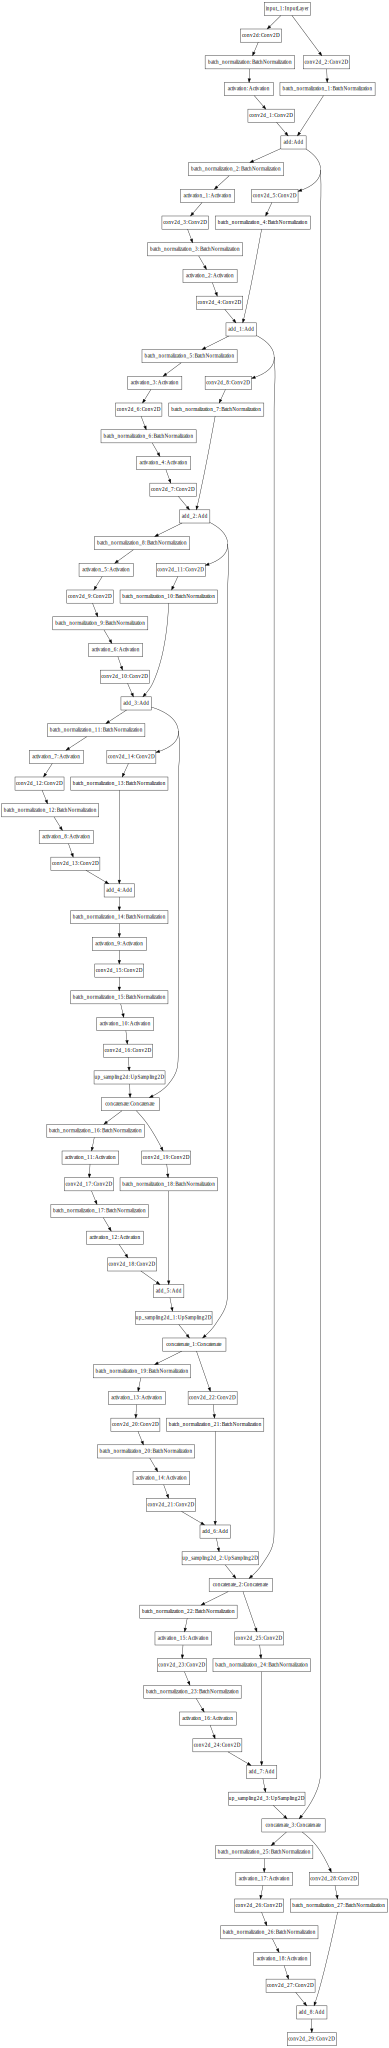

In [1]:
import os, glob
import sys
#import copy 
#import pydicom
import random
#import re
import scipy
import scipy.misc
import numpy as np
import cv2
#import imageio
#import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import tensorflow as tf
#from tensorflow import keras
import tensorflow.keras as keras
#from scipy.ndimage import rotate
from skimage import exposure
#from sklearn.metrics import confusion_matrix
#from operator import add 
#plt.set_cmap('gray')
#get_ipython().run_line_magic('matplotlib', 'inline')


#from tqdm import tqdm_notebook, tnrange
#from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
#from skimage.morphology import label
from sklearn.model_selection import train_test_split
import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.metrics import categorical_accuracy, binary_accuracy

## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed


IMG_DTYPE = np.float
SEG_DTYPE = np.uint8




import matplotlib.image as mpimg
from skimage.transform import resize

def load_image(infilename):
  """ Load an image from disk. """
  return resize(mpimg.imread(infilename),(64,400))
root_dir = "F:/data/"


image_dir = root_dir + "train_images/"
print(image_dir)
files = os.listdir(image_dir)
n = 100
print("Loading " + str(n) + " images")
tt=[load_image(image_dir + files[i]) for i in range(n)]
print(len(tt))
X = np.asarray(tt)
print(X.shape)
gt_dir = root_dir + "3/"
print("Loading " + str(n) + " images")
#gt_imgs = np.asarray([load_image(gt_dir + files[i]) for i in range(n)])





img_data_list = [] 
labels_list = []
for i in range(n):
    input_img=cv2.imread(gt_dir + files[i])
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    #mask = img_to_array(load_img(path_train + '//masks//' + id_, grayscale=False))
    input_img = resize(input_img, (64,400,1), mode='constant', preserve_range=True)
    #input_img_resize=cv2.resize(input_img,(128,128))
    img_data_list.append(input_img)
    #labels_list.append(label)

y = np.array(img_data_list)
y = y.astype('float32')
y /= 255
print (y.shape)
print("######################")

def bn_act(x, act=True):
    x = keras.layers.BatchNormalization()(x)
    if act == True:
        x = keras.layers.Activation("relu")(x)
    return x

def conv_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    conv = bn_act(x)
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(conv)
    return conv

def stem(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(x)
    conv = conv_block(conv, filters, kernel_size=kernel_size, padding=padding, strides=strides)
    
    shortcut = keras.layers.Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)
    
    output = keras.layers.Add()([conv, shortcut])
    return output

def residual_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    res = conv_block(x, filters, kernel_size=kernel_size, padding=padding, strides=strides)
    res = conv_block(res, filters, kernel_size=kernel_size, padding=padding, strides=1)
    
    shortcut = keras.layers.Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)
    
    output = keras.layers.Add()([shortcut, res])
    return output

def upsample_concat_block(x, xskip):
    u = keras.layers.UpSampling2D((2, 2))(x)
    c = keras.layers.Concatenate()([u, xskip])
    return c

def ResUNet():
    f = [16, 32, 64, 128, 256]
    #image_size = 256
    inputs = keras.layers.Input((None, None, 3))
    
    ## Encoder
    e0 = inputs
    e1 = stem(e0, f[0])
    e2 = residual_block(e1, f[1], strides=2)
    e3 = residual_block(e2, f[2], strides=2)
    e4 = residual_block(e3, f[3], strides=2)
    e5 = residual_block(e4, f[4], strides=2)
    
    ## Bridge
    b0 = conv_block(e5, f[4], strides=1)
    b1 = conv_block(b0, f[4], strides=1)
    
    ## Decoder
    u1 = upsample_concat_block(b1, e4)
    d1 = residual_block(u1, f[4])
    
    u2 = upsample_concat_block(d1, e3)
    d2 = residual_block(u2, f[3])
    
    u3 = upsample_concat_block(d2, e2)
    d3 = residual_block(u3, f[2])
    
    u4 = upsample_concat_block(d3, e1)
    d4 = residual_block(u4, f[1])
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d4)
    model = keras.models.Model(inputs, outputs)
    return model

checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    # Save weights, every 5-epochs.
    period=20)



model = ResUNet()
# model_dice = dice_hard_coe(smooth=1e-5, threshold=0.5)
adam = keras.optimizers.Adam()
model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])
model.summary()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import os
os.environ["PATH"] += os.pathsep + '''C:/Program Files (x86)/Graphviz2.38/bin/'''

# !pip install graphviz
SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Split train and valid
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=2018)
# el
# model.save('F:/data/Res-Unet_3.h5')
# model.evaluate(X_valid, y_valid, verbose=0) # Testing on validation dataset

In [2]:
from keras.utils import plot_model
plot_model(model, to_file='ResUNet.png')

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os, glob
import sys
import random
import scipy
import scipy.misc
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import tensorflow as tf
import tensorflow.keras as keras
from skimage import exposure
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.metrics import categorical_accuracy, binary_accuracy

def load_image(infilename):
  """ Load an image from disk. """
  image_bgr =cv2.imread(image_dir + files[4], cv2.IMREAD_COLOR)
  image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  image_rgb = image_rgb.reshape(1,256,1600,3)
  return image_rgb

import keras.backend as K
#import tensorflow as tf
#import numpy and np
def dice_coef(y_true, y_pred, smooth, thresh):
    #y_pred_t =( y_pred < thresh)
    #tf.print(y_pred_t, output_stream=sys.stdout)
    #y_pred_t=tf.cast(y_pred_t, tf.float32)
    #y_pred = y_pred * y_pred_t
    #tf.print(y_pred, output_stream=sys.stdout)
   # y_pred = tf.cond(y_pred < thresh, y_pred, 0)
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)

    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_loss(smooth, thresh):
    def dice(y_true, y_pred):
      return 1-dice_coef(y_true, y_pred, smooth, thresh)
    return dice

  
#keras.losses.dice_loss = dice_loss


root_dir = "F:/data/"
image_dir = root_dir + "train_images/"
print(image_dir)
files = os.listdir(image_dir)
n = len(files)
print(n)


model_dice = dice_loss(smooth=1e-5, thresh=0.5)
adam = keras.optimizers.Adam()
#model.compile(loss=model_dice, optimizer='adam', metrics=["accuracy"])
#model.summary()

# model = tf.keras.models.load_model('F:/data/Res-Unet_1.h5', custom_objects={'dice': dice_loss(smooth=1e-5, thresh=0.5)})
model.compile(loss=model_dice, optimizer='adam', metrics=["accuracy"])
model.summary()

#test=[]
#n=1
#for i in range(n):
image_rgb = load_image(image_dir + files[0])




In [ ]:
test = model.predict(image_rgb)


test =( test > 0.5)*255
#test=tf.cast(test, tf.float32)
#test = test * 255
print(test.shape)
print(test)
plt.imshow(test.reshape(256,1600),cmap='gray')
plt.show()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_150 (Conv2D)             (None, None, None, 1 448         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_140 (BatchN (None, None, None, 1 64          conv2d_150[0][0]                 
__________________________________________________________________________________________________
activation_95 (Activation)      (None, None, None, 1 0           batch_normalization_140[0][0]    
____________________________________________________________________________________________

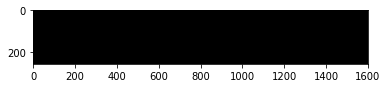

In [0]:
new_model = tf.keras.models.load_model('/content/Res-Unet_1.h5')
new_model.summary()
test=[]
#n=1
#for i in range(n):
image_rgb = load_image(image_dir + files[0])
test = new_model.predict(image_rgb)

test =( test < 0.5)
test=tf.cast(test, tf.float32)
test = test * 255
print(test.shape)
print(test)
plt.imshow(test.reshape(256,1600),cmap='gray')
plt.show()